## $P_{eq}$ and $D$ theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc("axes", labelsize = "large")
def cm2inch(value):
    return value/2.54

In [48]:
a = 1e-6 # particle radius
z = np.linspace(1e-9, 8e-6,10000)
D_rho = 50 # polystyrene density


In [49]:
xi = a/(z+a)
D_x_over_D_0 = (1 - 9/16*xi + 1/8*xi**3 - 45/256*xi**4 - 1/16*xi**5)

Text(0, 0.5, '$D_\\parallel / D_0 $')

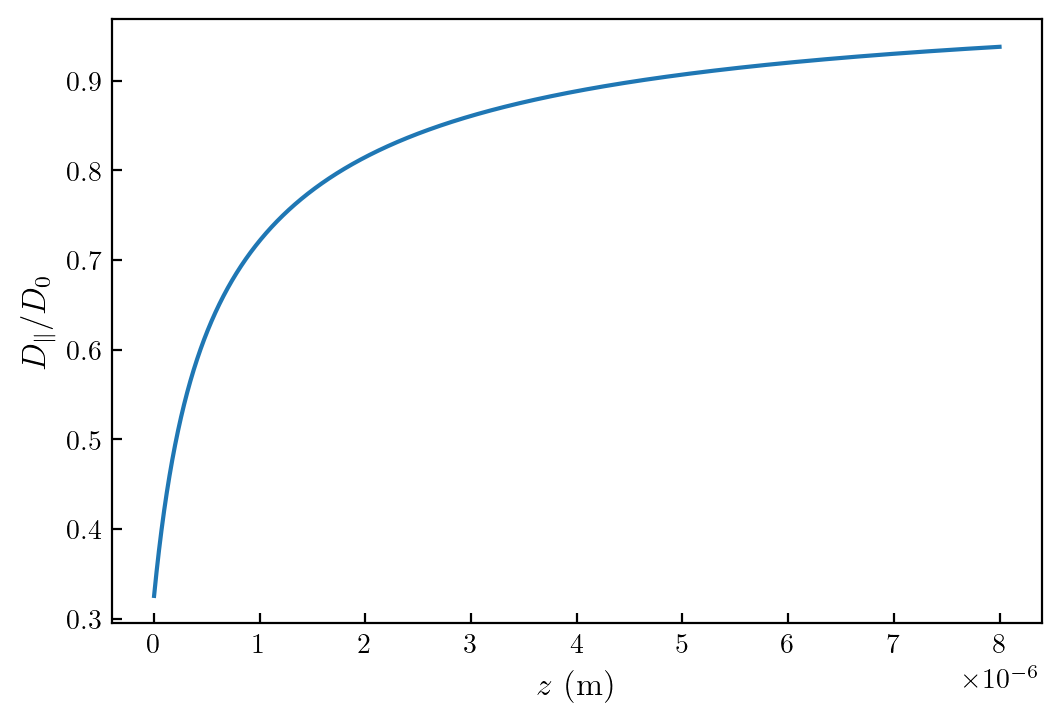

In [50]:
plt.plot(z, D_x_over_D_0)
plt.xlabel("$z$ (m)")
plt.ylabel("$D_\parallel / D_0 $")

In [51]:
D_z_over_D_0 = (6*z**2 + 2*a*z) / (6*z**2 + 9*a*z + 2*a**2)

Text(0, 0.5, '$D_\\bot / D_0 $')

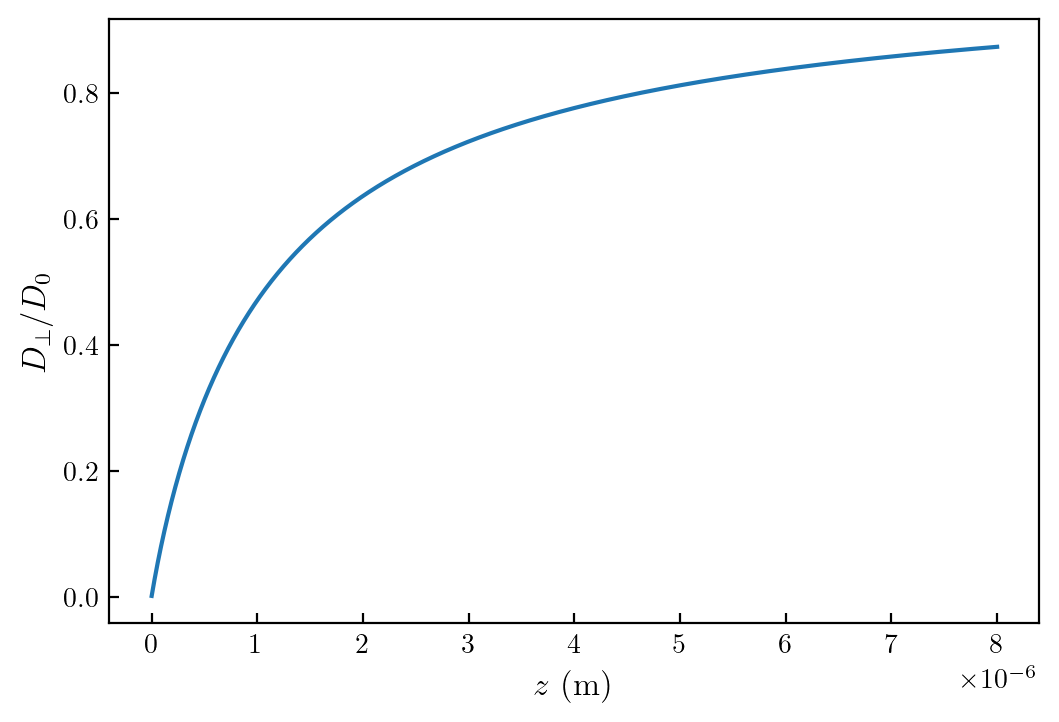

In [52]:
plt.plot(z, D_z_over_D_0)
plt.xlabel("$z$ (m)")
plt.ylabel("$D_\\bot / D_0 $")

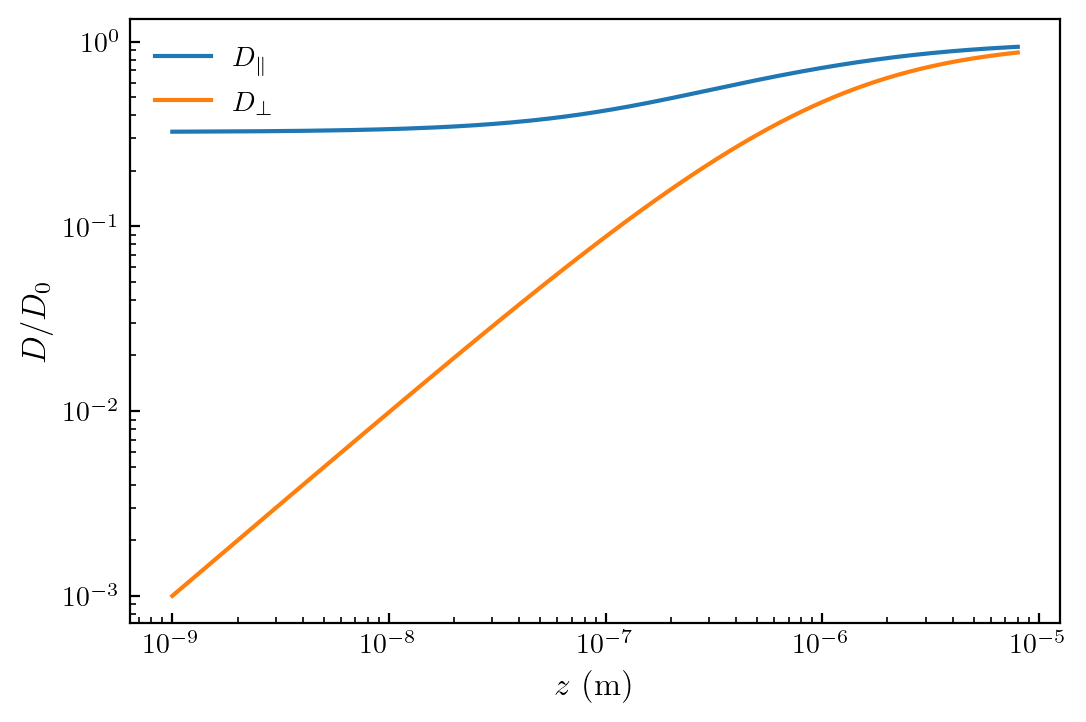

In [53]:
plt.plot(z, D_x_over_D_0, label = "$D_\parallel$")
plt.loglog(z, D_z_over_D_0, label = "$D_\\bot$")
plt.xlabel("$z$ (m)")
plt.ylabel("$D / D_0 $")
plt.legend(frameon=False)

## Now let's compute the Gibbs-Boltzmann distribution

In [54]:
B = 4 #kbT units
lb = 4e-21 / (4/3*np.pi* a**3 * D_rho * 9.81)
ld = 100e-9 # Debye length

In [55]:
P_eq = np.exp(-B*np.exp(-z/ld) - z/lb)
#normalization:
P_eq = P_eq / np.trapz(P_eq, z)

Text(0, 0.5, '$P_{eq}$ ($\\mathrm{m}^{-1}$)')

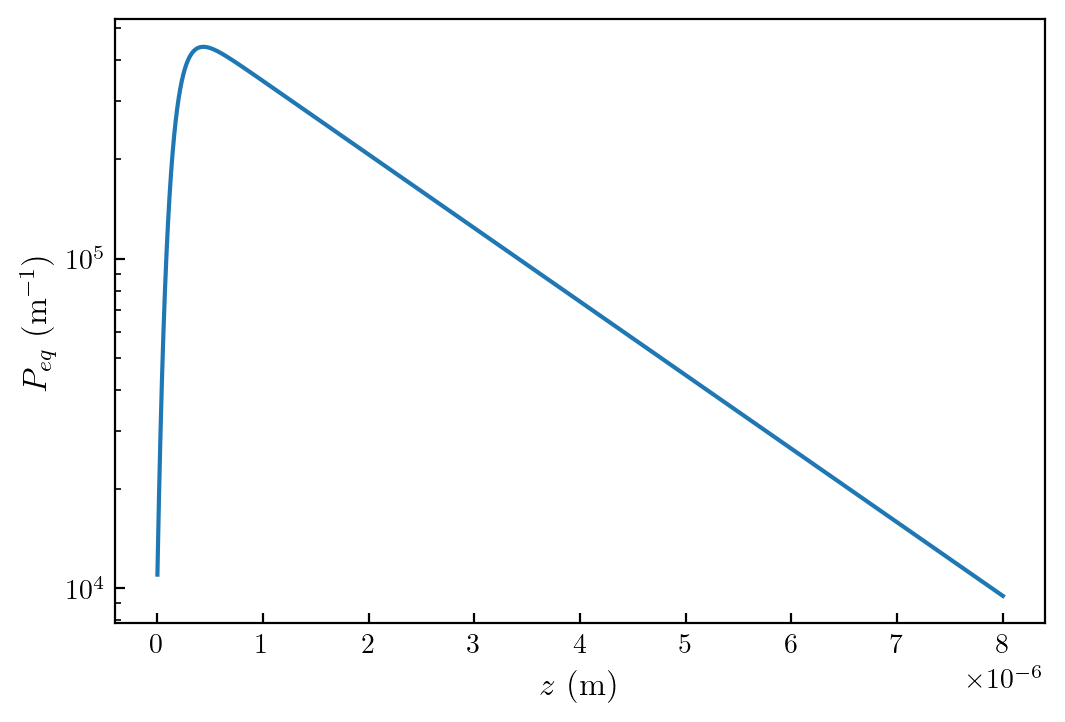

In [56]:
plt.semilogy(z, P_eq)
plt.xlabel("$z$ (m)")
plt.ylabel("$P_{eq}$ ($\mathrm{m}^{-1}$)")

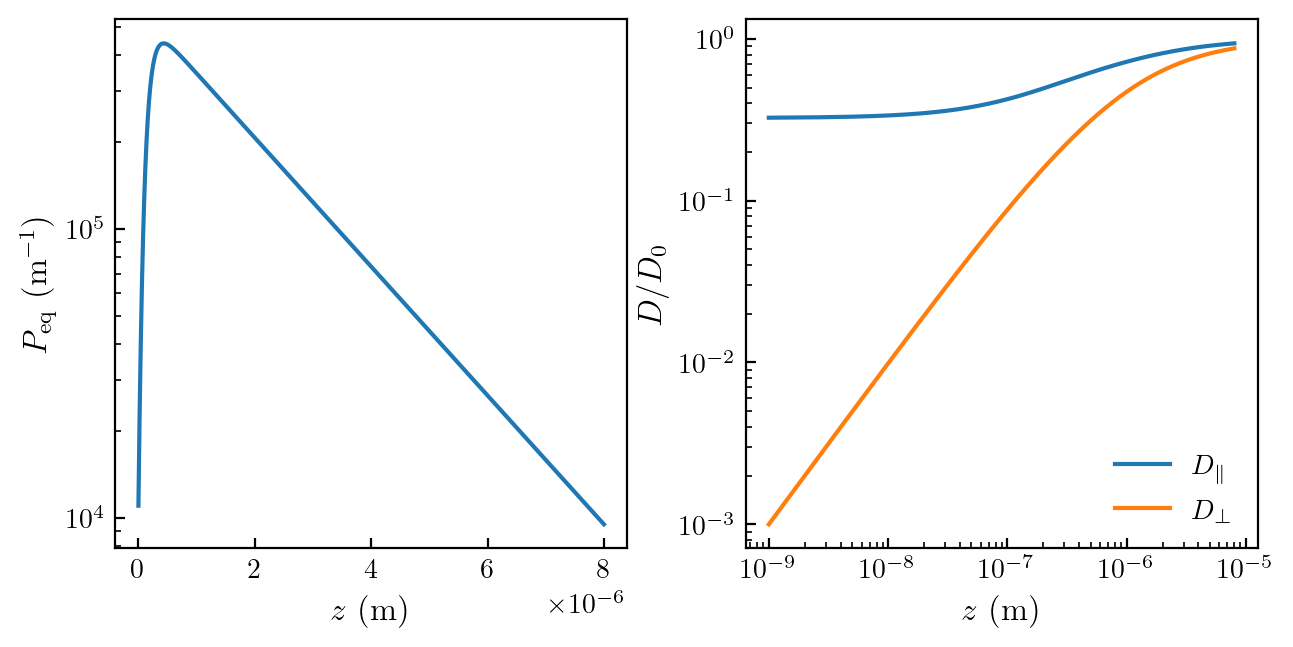

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (cm2inch(16),cm2inch(8)))

ax1.semilogy(z, P_eq) 
ax1.set( xlabel="$z$ (m)", ylabel="$P_\mathrm{eq}$ ($\mathrm{m}^{-1}$)")

ax2.plot(z, D_x_over_D_0, label = "$D_\parallel$")
ax2.loglog(z, D_z_over_D_0, label = "$D_\\bot$")

ax2.set( xlabel="$z$ (m)", ylabel="$D/D_0$")

plt.legend(frameon=False)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=1.0)
                               
plt.savefig("theorie_chap1.pdf")